In [ ]:
# IMPORT LIBRARY
from os import X_OK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
!pip install ydata-profiling # install ydata-profiling
from ydata_profiling import ProfileReport # import ProfileReport from ydata-profiling
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f45ccf70d748e8470c8d2f784998c89e25aea0ee3074c8c9b588d4867995954f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# import dataset dari google drive
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1ucDcH1jJKD7XDXGL4t5wc0c2tq8cNhp-/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('online_shoppers_intention.csv')

df = pd.read_csv('online_shoppers_intention.csv')
data = df
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### **PENANGANAN MISSING VALUE**

In [ ]:
# HAPUS MISSING VALUE
df.isnull()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values in each column
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df = df.dropna()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### **PROSES ENCODING**

In [ ]:
# Deteksi kolom dengan tipe data object (kategorikal)
categorical_columns = data.select_dtypes(include=['object']).columns

# Deteksi kolom dengan tipe data boolean
boolean_columns = data.select_dtypes(include=['bool']).columns

print("Kolom Kategorikal:", categorical_columns)
print("Kolom Boolean:", boolean_columns)

Kolom Kategorikal: Index(['Month', 'VisitorType'], dtype='object')
Kolom Boolean: Index(['Weekend', 'Revenue'], dtype='object')


In [ ]:
# ENCODING MONTH
# Ubah nama bulan ke angka: Jan=1, Feb=2, ..., Dec=12
columns_to_convert = ['Month']

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

for column in columns_to_convert:
    data[column] = data[column].map(month_mapping)

# Tampilkan 10 data pertama
data[:10]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,Returning_Visitor,False,False


In [ ]:
# ENCODING VISITOR TYPE
# change new_visitor = 0, returning_visitor = 1, other = 2

columns_to_convert = ['VisitorType']

for column in columns_to_convert:
    data[column] = data[column].map({'Returning_Visitor': 1, 'New_Visitor': 0, 'Other':2})

data[:10] #read first 10 data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,1,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,1,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,1,False,False


In [ ]:
# ENCODING WEEKEND SAMA REVENUE
# change new_visitor = 0, returning_visitor = 1

columns_to_convert = ['Weekend', 'Revenue']

for column in columns_to_convert:
    data[column] = data[column].map({True: 1, False: 0})  # Mapping boolean True/False

data[:10]  # Read first 10 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,1,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,1,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,1,0,0


### **SPLIT DATASET** :

In [ ]:
# SPLIT DATASET (training : 70 testing :30)
# datanya pake yg data_feature_2 (udah feature selection sama udah digabungin sama class)
# target = kolom "Revenue"
X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **APPLYING UNDERSAMPLING**


In [ ]:
# Menggunakan RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersampler.fit_resample(X_train, y_train)

# Menampilkan jumlah kelas dalam y_train sebelum undersampling
print("Rasio data sebelum undersampling:")
print(y_train.value_counts())

# Setelah menerapkan undersampling
print("Rasio data setelah undersampling:")
print(y_train_undersample.value_counts())

Rasio data sebelum undersampling:
Revenue
0    7298
1    1333
Name: count, dtype: int64
Rasio data setelah undersampling:
Revenue
0    1333
1    1333
Name: count, dtype: int64


### **FEATURE SELECTION (PCA)**

In [ ]:
# ----------- FEATURE SELECTION <PCA>------------------

# Standarisasi data sebelum melakukan PCA
scaler = StandardScaler()
X_train_undersample_scaled = scaler.fit_transform(X_train_undersample)

# Melakukan PCA dan memilih semua komponen utama
pca = PCA(n_components=None)  # Semua komponen
X_train_pca = pca.fit_transform(X_train_undersample_scaled)


In [ ]:
# Menghitung loadings untuk setiap fitur pada komponen utama (untuk semua komponen)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=X_train_undersample.columns  # Disesuaikan untuk data undersampling
)

# Menghitung skor total untuk setiap fitur sebagai nilai absolut dari loadings pada semua komponen
loadings['PCA Skor'] = loadings.abs().sum(axis=1)

# Menampilkan 10 fitur dengan skor PCA tertinggi
pca_top_features = loadings[['PCA Skor']].sort_values(by='PCA Skor', ascending=False).head(10)

# Tampilkan hasil
print(pca_top_features)


                         PCA Skor
VisitorType              3.055190
ProductRelated           3.003671
Administrative_Duration  2.994184
PageValues               2.977654
ProductRelated_Duration  2.963914
BounceRates              2.886860
Administrative           2.873284
Informational_Duration   2.819967
Browser                  2.777766
SpecialDay               2.759847


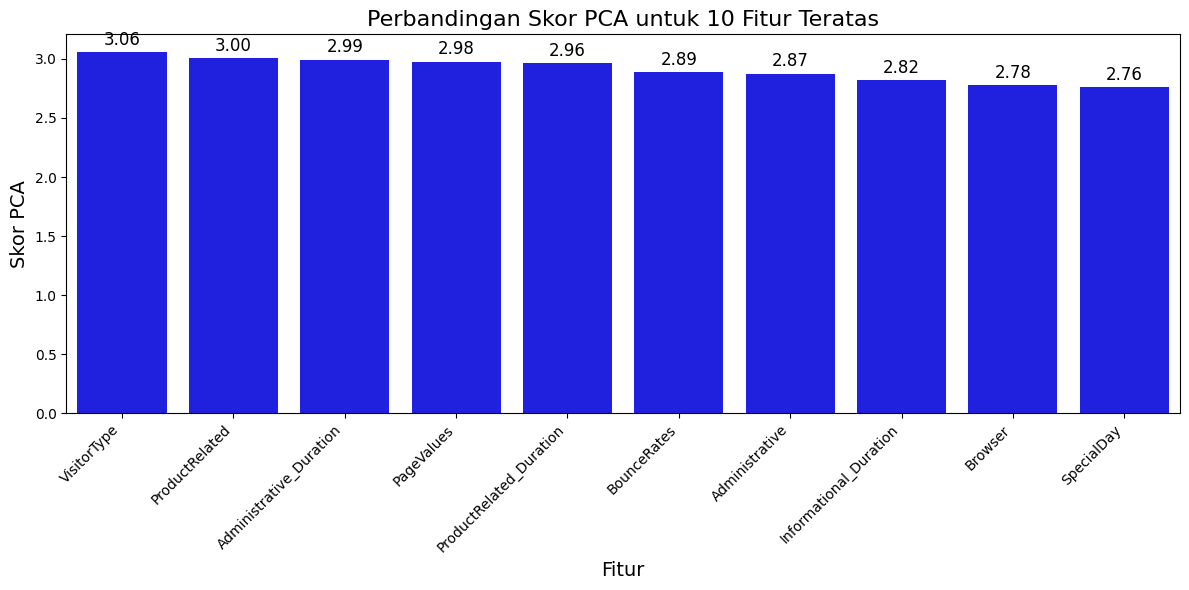

In [ ]:
# Membuat plot berdasarkan tabel 10 fitur dengan skor PCA tertinggi
plt.figure(figsize=(12, 6))

# Bar plot
ax = sns.barplot(x=pca_top_features.index, y=pca_top_features['PCA Skor'], color='blue')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Skor PCA untuk 10 Fitur Teratas', fontsize=16)
plt.xlabel('Fitur', fontsize=14)
plt.ylabel('Skor PCA', fontsize=14)

# Mengatur rotasi label sumbu X agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')

# Menampilkan label skor PCA di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Memindahkan label di atas bar
                textcoords='offset points', fontsize=12)

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

In [ ]:
# Mengambil nama fitur dari tabel 10 fitur teratas berdasarkan skor PCA
top_feature_names = pca_top_features.index.values

# Membuat dataframe baru hanya dengan fitur yang memiliki 10 skor PCA tertinggi
X_train_pca_top = X_train_undersample[top_feature_names]
X_test_pca_top = X_test[top_feature_names]


### **GA PAKE HYPERPARAMETER TURNING :**

Accuracy: 0.8302
Precision: 0.4051
F1-Score: 0.5906
AUC Score: 0.8920
Cohen’s Kappa Score: 0.4918
Confusion Matrix:
[[2618  506]
 [ 122  453]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      3124
           1       0.47      0.79      0.59       575

    accuracy                           0.83      3699
   macro avg       0.71      0.81      0.74      3699
weighted avg       0.88      0.83      0.85      3699



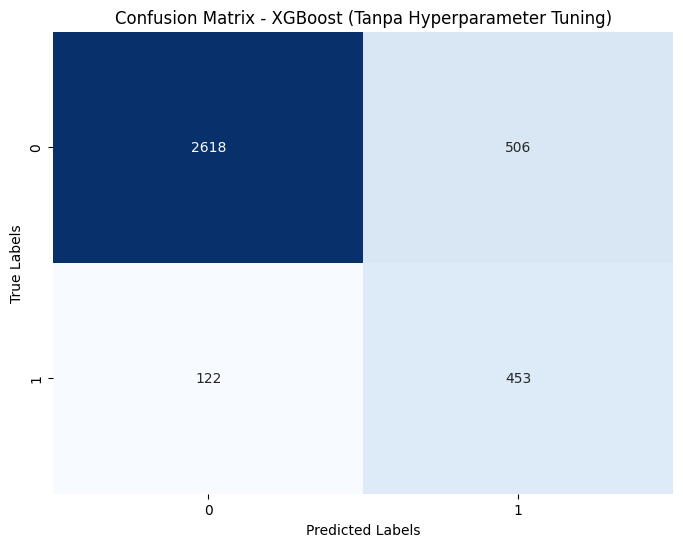

In [ ]:
# Inisialisasi XGBoost classifier dengan default hyperparameter
xgb_classifier = XGBClassifier(random_state=42)

# Training model dengan data yang sudah dipilih berdasarkan fitur top 10 PCA
xgb_classifier.fit(X_train_pca_top, y_train_undersample)

# Prediksi menggunakan X_test yang sudah dipilih berdasarkan fitur top 10 PCA
y_pred = xgb_classifier.predict(X_test_pca_top)

# Jika probabilitas prediksi dibutuhkan untuk AUC
y_pred_proba = xgb_classifier.predict_proba(X_test_pca_top)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
accuracy_xgb_default_undersampling = accuracy

precision = average_precision_score(y_test, y_pred)
precision_xgb_default_undersampling = precision

f1score = f1_score(y_test, y_pred)
f1score_xgb_default_undersampling = f1score

auc_score = roc_auc_score(y_test, y_pred_proba)  # Menggunakan probabilitas untuk AUC
kappa_score = cohen_kappa_score(y_test, y_pred)  # Menghitung Cohen's Kappa Score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan metrik evaluasi
print(f'Accuracy: {accuracy_xgb_default_undersampling:.4f}')
print(f'Precision: {precision_xgb_default_undersampling:.4f}')
print(f'F1-Score: {f1score_xgb_default_undersampling:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print(f'Cohen’s Kappa Score: {kappa_score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost (Tanpa Hyperparameter Tuning)')
plt.show()


### **MEMAKAI HYPERPARAMETER TURNING**

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'eta': 0.2}
Accuracy: 0.8619
Precision: 0.4717
F1-Score: 0.6517
AUC Score: 0.9122
Cohen’s Kappa Score: 0.5705
Confusion Matrix:
[[2710  414]
 [  97  478]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3124
           1       0.54      0.83      0.65       575

    accuracy                           0.86      3699
   macro avg       0.75      0.85      0.78      3699
weighted avg       0.90      0.86      0.87      3699



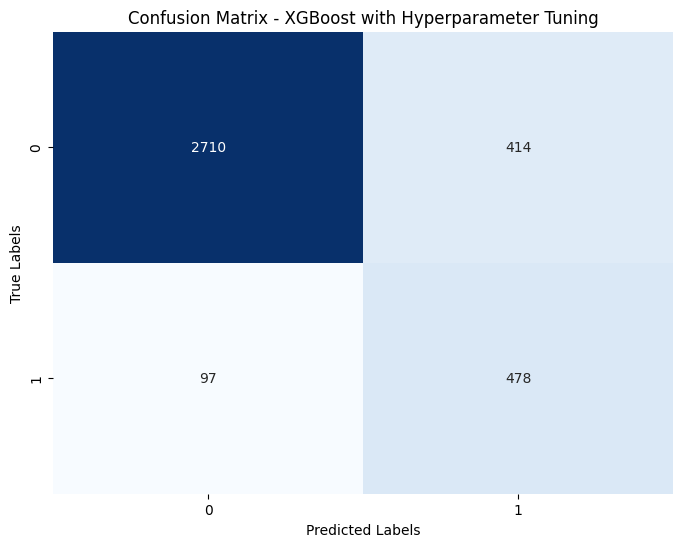

In [ ]:
# Inisialisasi model XGBoost dengan hyperparameter dasar
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Menentukan distribusi parameter yang ingin dituning
param_dist = {
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'eta': [0.01, 0.1, 0.2]
}

# Menggunakan RandomizedSearchCV untuk mencari parameter terbaik
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=10, verbose=1, n_jobs=-1, random_state=42)

# Melatih model dengan data training yang menggunakan 10 fitur PCA teratas
random_search.fit(X_train_pca_top, y_train_undersample)

# Mendapatkan model terbaik dari hasil random search
best_xgb = random_search.best_estimator_

# Prediksi menggunakan model terbaik di X_test
y_pred = best_xgb.predict(X_test_pca_top)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = average_precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, best_xgb.predict_proba(X_test_pca_top)[:, 1])  # Menggunakan probabilitas untuk AUC
kappa_score = cohen_kappa_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan metrik evaluasi
print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1score:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print(f'Cohen’s Kappa Score: {kappa_score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost with Hyperparameter Tuning')
plt.show()
